In [1]:
import os
os.chdir('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [4]:
from utils.dataset_loader import get_dataset, trial_collate_fn
from torch.utils.data import DataLoader
from predictors import TrialPredictor
from models.feature_extractor import FeatureExtractor
from utils.generate_trials import get_trials
from utils.utils import set_seed, save_trial_results, get_results_dir
from utils.model_loader import get_default_full_layers

for layer in [1, 2, 3, 4]:
    args = {
        'model': f'stitch_cvcl_clip_layer{layer}',
        'trial_type': 'custom',
        'class_type': 'seen', # as based model txt encoder in CVCL is not trained on unseen classes
        'seed': 0,
        'num_img_per_trial': 4,
        'num_trials_per_image': 5,
        'map_file': None,
        'object_resize': False,
        'batch_size': 128,
        'device': 'cuda:1',
        'results_root_dir': './experiments/trial/',
        'csv_save_path': './results/overall_acc_v2.csv',
    }
    set_seed(args['seed'])
    from utils.model_loader import load_model

    model_name = args['model']
    model, transform = load_model(model_name, seed=args['seed'], device=args['device'])

    trial_path = get_trials(args['trial_type'], args['seed'], args['num_img_per_trial'], args['num_trials_per_image'], args['class_type'], args['map_file'], args['object_resize'])
    data = get_dataset(dataset_name='object-trial', trials_file_path=trial_path, transform=transform)
    dataloader = DataLoader(data, batch_size=args['batch_size'], shuffle=False, num_workers=4, collate_fn=trial_collate_fn)



    ### STEP 3: Initialize the trial classifier
    feature_extractor = FeatureExtractor(model_name, model, args['device'])
    classifier = TrialPredictor(feature_extractor)

    ### STEP 4: Predict the trial results
    if args['map_file'] is not None: # using neurons
        layers = get_default_full_layers(model_name) if args['layers'] is None else args['layers'].split(",")
        predictions = classifier.predict_using_neurons(dataloader, layers, args['map_file'], args['top_k'])
    else: 
        predictions = classifier.predict(dataloader) 

    ### STEP 5: Save the results
    results_dir = get_results_dir(args, args['results_root_dir'])  # Changed args_dict to args
    save_trial_results(results_dir, args, predictions, args['csv_save_path'])  # Changed args_dict to args

Loading checkpoint from cvcl_s_dino_resnext50_embedding.ckpt
Loading checkpoint from /home/xke001/.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt


Lightning automatically upgraded your loaded checkpoint from v1.5.8 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt`


Successfully loaded cvcl-resnext
Successfully loaded CLIP-RN50
Loading weights from: experiments/stitch_layer/stitch_cvcl_clip_layer1_0_imagenet_val_2024-12-19-19-00-33/best_model.pth
Map_file is None, predicting without neuron concepts
Trial file already exists: data/trials/seen_object_5_4_0.json, skipping generation.
Loading dataset: object-trial


Trial Prediction: 100%|██████████| 38/38 [02:04<00:00,  3.27s/it]


Overall Accuracy updated in ./results/overall_acc_v2.csv
Results saved to ./experiments/trial/stitch_cvcl_clip_layer1_custom_2024-12-19-23-08-22
Loading checkpoint from cvcl_s_dino_resnext50_embedding.ckpt
Loading checkpoint from /home/xke001/.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt


Lightning automatically upgraded your loaded checkpoint from v1.5.8 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt`


Successfully loaded cvcl-resnext
Successfully loaded CLIP-RN50
Loading weights from: experiments/stitch_layer/stitch_cvcl_clip_layer2_0_imagenet_val_2024-12-19-17-25-26/best_model.pth
Map_file is None, predicting without neuron concepts
Trial file already exists: data/trials/seen_object_5_4_0.json, skipping generation.
Loading dataset: object-trial


Trial Prediction: 100%|██████████| 38/38 [02:03<00:00,  3.24s/it]


Overall Accuracy updated in ./results/overall_acc_v2.csv
Results saved to ./experiments/trial/stitch_cvcl_clip_layer2_custom_2024-12-19-23-10-31
Loading checkpoint from cvcl_s_dino_resnext50_embedding.ckpt
Loading checkpoint from /home/xke001/.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt


Lightning automatically upgraded your loaded checkpoint from v1.5.8 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt`


Successfully loaded cvcl-resnext
Successfully loaded CLIP-RN50
Loading weights from: experiments/stitch_layer/stitch_cvcl_clip_layer3_0_imagenet_val_2024-12-19-16-38-35/best_model.pth
Map_file is None, predicting without neuron concepts
Trial file already exists: data/trials/seen_object_5_4_0.json, skipping generation.
Loading dataset: object-trial


Trial Prediction: 100%|██████████| 38/38 [02:02<00:00,  3.22s/it]


Overall Accuracy updated in ./results/overall_acc_v2.csv
Results saved to ./experiments/trial/stitch_cvcl_clip_layer3_custom_2024-12-19-23-12-40
Loading checkpoint from cvcl_s_dino_resnext50_embedding.ckpt
Loading checkpoint from /home/xke001/.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt


Lightning automatically upgraded your loaded checkpoint from v1.5.8 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/f50eaa0c50a6076a5190b1dd52aeeb6c3e747045/cvcl_s_dino_resnext50_embedding.ckpt`


Successfully loaded cvcl-resnext
Successfully loaded CLIP-RN50
Loading weights from: experiments/stitch_layer/stitch_cvcl_clip_layer4_0_imagenet_val_2024-12-19-14-46-27/best_model.pth
Map_file is None, predicting without neuron concepts
Trial file already exists: data/trials/seen_object_5_4_0.json, skipping generation.
Loading dataset: object-trial


Trial Prediction: 100%|██████████| 38/38 [02:02<00:00,  3.22s/it]


Overall Accuracy updated in ./results/overall_acc_v2.csv
Results saved to ./experiments/trial/stitch_cvcl_clip_layer4_custom_2024-12-19-23-14-49


/tmp/ipykernel_107231/3159964485.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


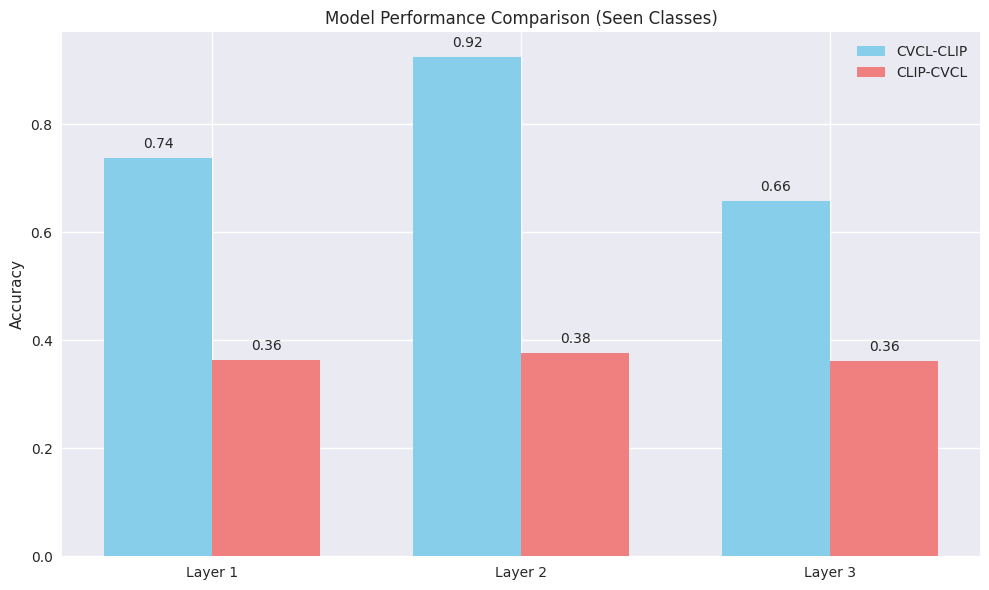

In [3]:

# 读取数据
df = pd.read_csv('stitch.csv')

# 只选择seen class type的数据
df_seen = df[df['class_type'] == 'seen']

# 计算每个模型和层的平均准确率
results = []
for layer in [1, 2, 3]:
    # CVCL-CLIP
    cvcl_clip = df_seen[df_seen['model'] == f'cvcl-clip-layer{layer}']['overall_accuracy'].mean()
    # CLIP-CVCL
    clip_cvcl = df_seen[df_seen['model'] == f'clip-cvcl-layer{layer}']['overall_accuracy'].mean()
    results.append([f'Layer {layer}', cvcl_clip, clip_cvcl])

# 创建DataFrame
results_df = pd.DataFrame(results, columns=['Layer', 'CVCL-CLIP', 'CLIP-CVCL'])

# 设置绘图风格
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))

# 设置bar的位置
x = np.arange(len(results_df['Layer']))
width = 0.35

# 绘制柱状图
ax.bar(x - width/2, results_df['CVCL-CLIP'], width, label='CVCL-CLIP', color='skyblue')
ax.bar(x + width/2, results_df['CLIP-CVCL'], width, label='CLIP-CVCL', color='lightcoral')

# 设置图表属性
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison (Seen Classes)')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Layer'])
ax.legend()

# 添加数值标签
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width()/2

        label = f'{y_value:.2f}'
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                   textcoords="offset points", ha='center', va='bottom')

add_value_labels(ax)

plt.tight_layout()
plt.show()